In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
stock_data = pd.read_excel("C:/Users/chapa/Downloads/almostdone.xlsx")

In [3]:
stock_data

,Date,EPS,Book Value,COF,Dividend,inflation,Remittance Growth Rate(%),Open,High,Low,...,MA_10,Bollinger_Middle,Bollinger_Upper,Bollinger_Lower,MACD,Signal_Line,polarity,subjectivity,MA_30,Compound Sensitivity
0,2018-04-27,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,...,1030.10,1001.550,1074.016475,929.083525,9.680262,2.875483,0.000000,0.000000,1004.400000,0.0000
1,2018-04-28,46.70,210.00,4.63,0.48,6.00,7.0,1050.0,1050.0,1020.0,...,1030.10,1001.550,1074.016475,929.083525,9.680262,2.875483,0.000000,0.000000,1004.400000,0.0000
2,2018-04-29,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
3,2018-04-30,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
4,2018-05-01,46.70,210.00,4.63,0.48,6.00,7.0,1015.0,1020.0,1002.0,...,1032.60,1005.050,1072.865854,937.234146,8.143550,3.929096,0.000000,0.000000,1004.400000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978,2023-09-26,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.483333,0.9987
1979,2023-09-27,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.390000,0.9987
1980,2023-09-28,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.300000,0.9987
1981,2023-09-29,27.82,214.69,7.81,0.30,7.52,25.8,596.0,596.0,586.2,...,591.93,598.055,613.631197,582.478803,-4.659392,-3.511786,0.166667,0.522222,587.300000,0.9987


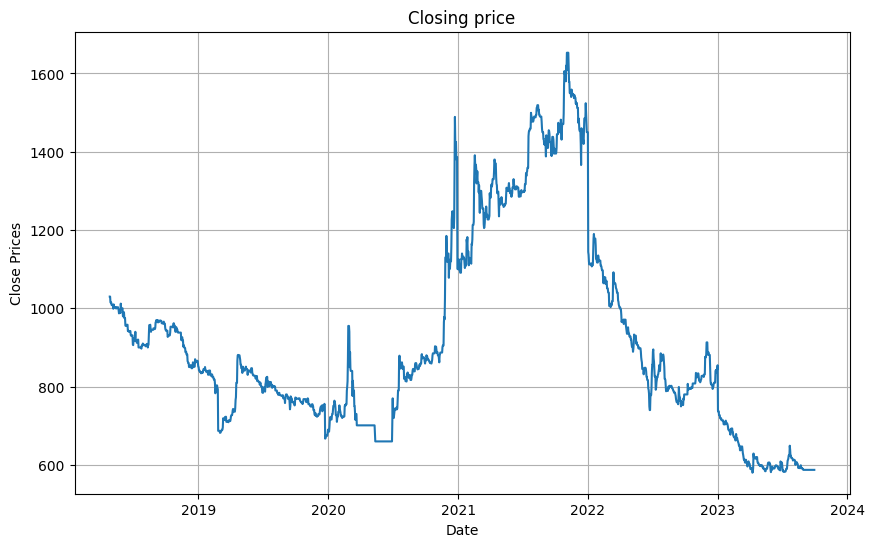

In [4]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Date'],stock_data['Close'])
plt.title('Closing price')
plt.show()

<Axes: ylabel='Density'>

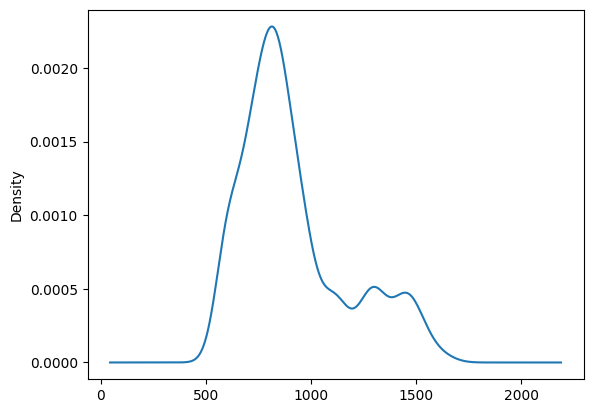

In [5]:
df_close = stock_data['Close']
df_close.plot(kind='kde')


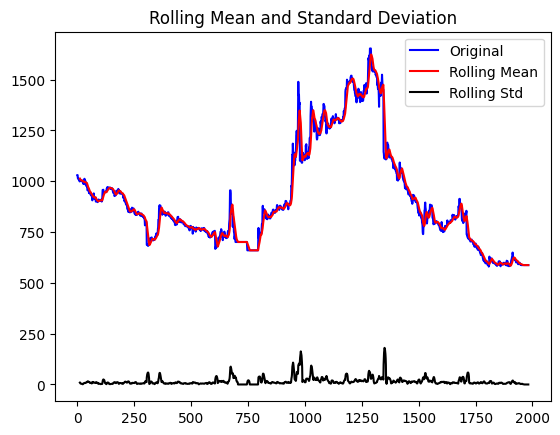

Results of dickey fuller test
Test Statistics                  -1.320689
p-value                           0.619655
No. of lags used                  7.000000
Number of observations used    1975.000000
critical value (1%)              -3.433665
critical value (5%)              -2.863005
critical value (10%)             -2.567550
dtype: float64


In [6]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

<Figure size 640x480 with 0 Axes>

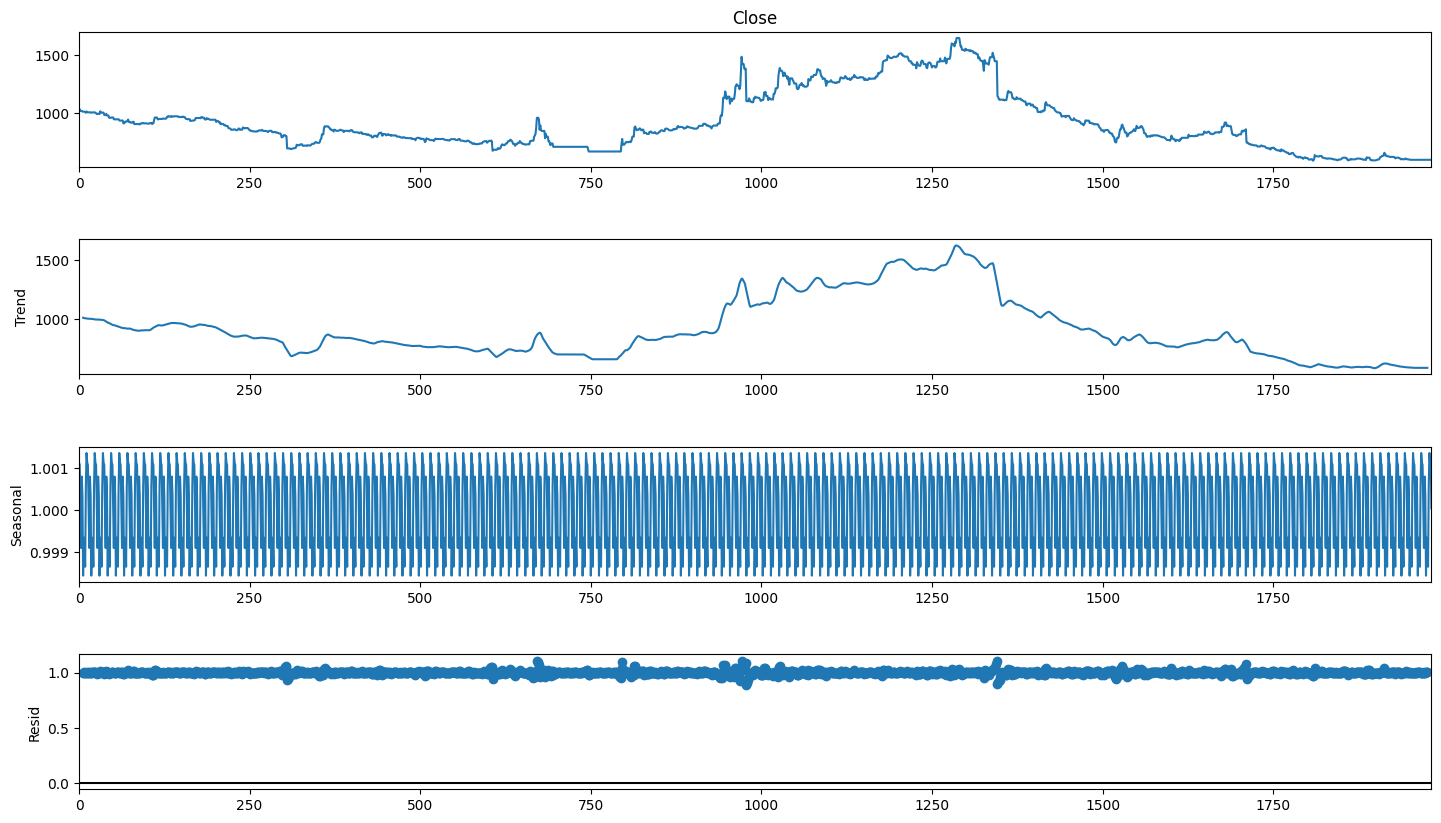

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Specify the seasonal period (e.g., 12 for monthly data)
seasonal_period = 12

# Perform seasonal decomposition
result = seasonal_decompose(df_close, model='multiplicative', period=seasonal_period)

# Plot the decomposed components
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


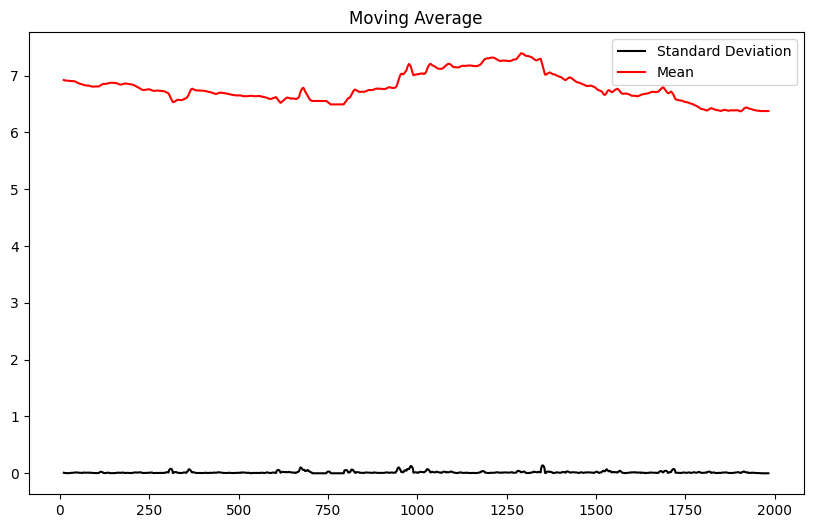

In [8]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

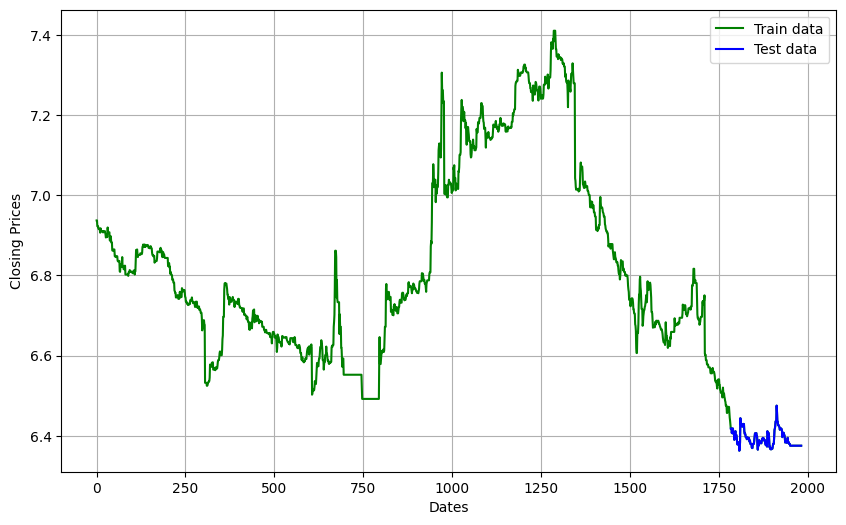

In [9]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9612.902, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9617.825, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9618.027, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9614.378, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9618.291, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9614.040, Time=0.73 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9614.387, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9616.524, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9616.039, Time=0.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9615.718, Time=1.68 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9619.722, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9619.562, Time=0.24 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9619.361, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9618.505, Time=0.57 sec
 ARIMA(1,1,2)(0,0,0

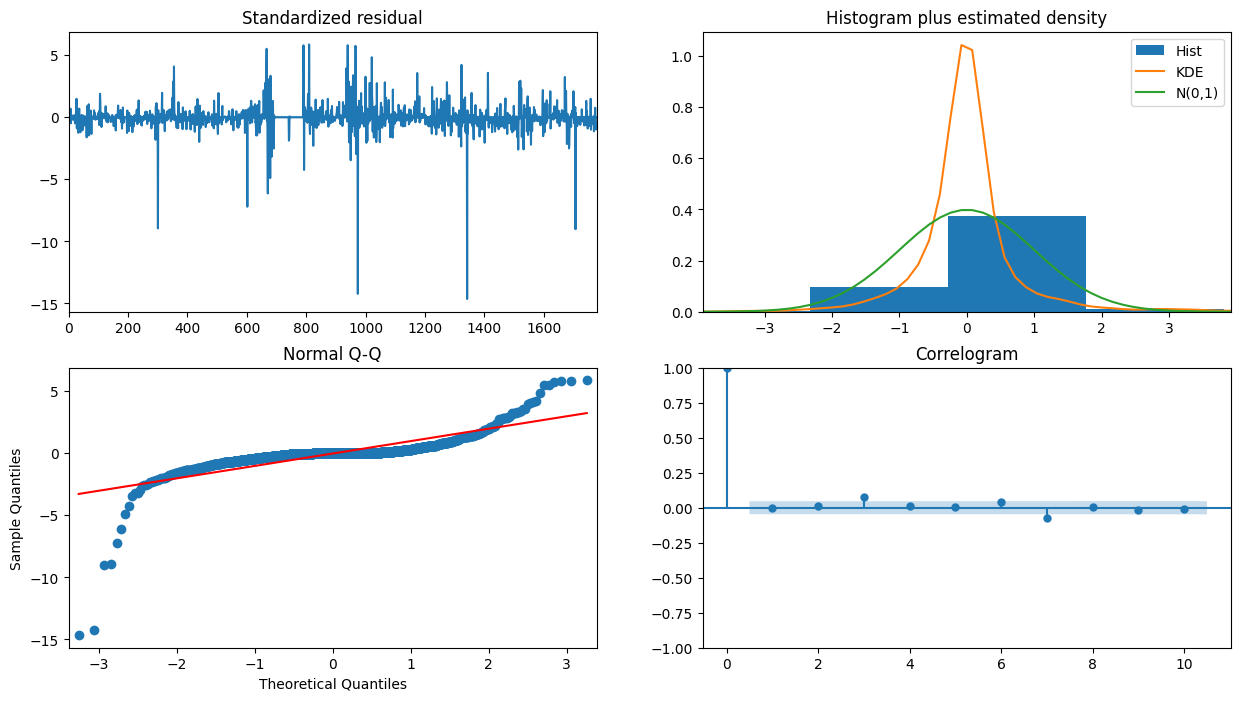

In [10]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [11]:
model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1781
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4811.953
Date:                Tue, 31 Oct 2023   AIC                          -9615.907
Time:                        22:25:45   BIC                          -9593.969
Sample:                             0   HQIC                         -9607.804
                               - 1781                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0397      1.655      0.024      0.981      -3.203       3.283
ma.L1          0.0261      1.656      0.016      0.987      -3.219       3.271
ma.L2         -0.0159      0.110     -0.144      0.8

In [12]:
arima_fit =auto_arima(train_data, error_action ='ignore',suppress_warnings=True, stepwise= False, approximation = False, seasonal = False)
arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1781
Model:               SARIMAX(3, 1, 0)   Log Likelihood                4818.145
Date:                Tue, 31 Oct 2023   AIC                          -9626.290
Time:                        22:26:00   BIC                          -9598.868
Sample:                             0   HQIC                         -9616.162
                               - 1781                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0002      0.000     -0.547      0.584      -0.001       0.001
ar.L1          0.0640      0.015      4.172      0.000       0.034       0.094
ar.L2         -0.0162      0.021     -0.768      0.442      -0.057       0.025
ar.L3          0.0829      0.020      4.138      0.000       0.044       0.122
sigma2         0.0003   1.87e-06    139.446      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            287626.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                            -3.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        64.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
n_fcast1= len(test_data)

In [14]:
n_fcast1

199

In [15]:
arima_fcast = arima_fit.predict(n_periods=n_fcast1, return_conf_int = True, alpha = 0.05)

In [16]:
model = auto_arima(train_data, 
                        m=1, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-9612.902, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-9617.825, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-9618.027, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-9614.378, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-9618.291, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9614.040, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9614.387, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-9616.524, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-9616.039, Time=0.45 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9615.718, Time=1.70 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-9619.722, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-9619.562, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-9619.361, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-9618.505, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0

In [17]:
predictions = model.predict(n_periods=len(test_data))

# Calculate the RMSE
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f'Root Mean Square Error (RMSE): {rmse}')

Root Mean Square Error (RMSE): 0.03806436814060186


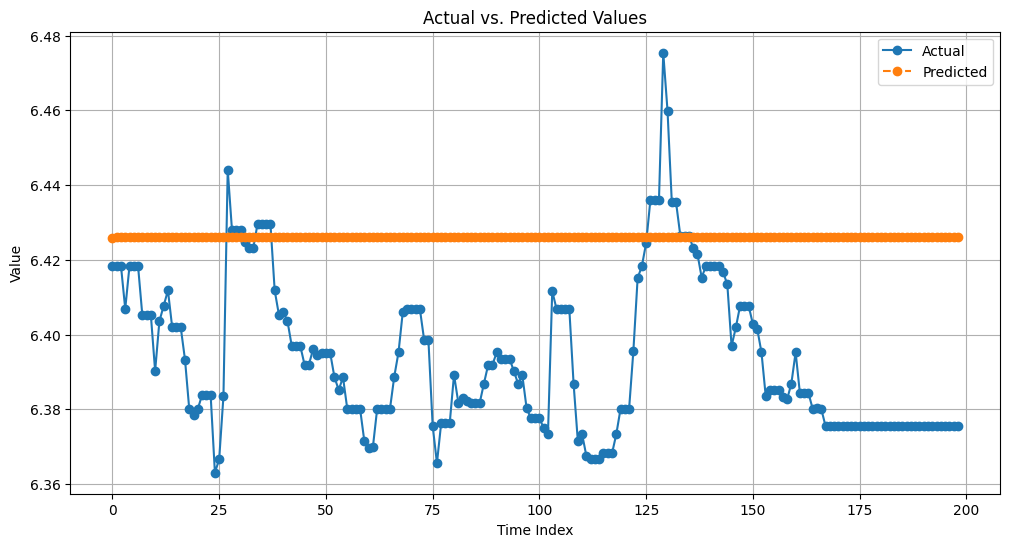

Root Mean Square Error (RMSE): 0.03806436814060186


In [18]:
import matplotlib.pyplot as plt

# Assuming you have 'test_data', 'predictions', and 'rmse' from the previous code

# Create a time index for your test data (assuming it's a time series)
time_index = range(len(test_data))

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(time_index, test_data, label='Actual', marker='o')
plt.plot(time_index, predictions, label='Predicted', linestyle='dashed', marker='o')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print(f'Root Mean Square Error (RMSE): {rmse}')
